# Chest Clinic

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

path1k = r"../sample generator/amostras1000.csv"; 
path10k = r"../sample generator/amostras10000.txt"; 

df_chest1k = pd.read_csv(path1k, header=None)
df_chest1k.columns = ['Visita Asia', 'Fuma', 'Tuberculose', 'Cancer Pulmao', 
'Bronquite', 'Tuberculose ou Cancer', 'RaioX', 
'Dispneia']

df_chest10k = pd.read_csv(path10k, header=None)

### Separação em conjunto de treinamento (70% da base) e teste (30% da base)

In [2]:
X1k, y1k = train_test_split(df_chest1k, test_size=0.3, random_state=0)

X1k_train = X1k[X1k.columns[:7]]
X1k_test = y1k[y1k.columns[:7]]
y1k_train = X1k['Dispneia']
y1k_test = y1k['Dispneia']

X10k, y10k = train_test_split(df_chest10k, test_size=0.3, random_state=0)

X10k_train = X10k[X10k.columns[:7]]
X10k_test = y10k[y10k.columns[:7]]
y10k_train = X10k['Dispneia']
y10k_test = y10k['Dispneia']

# <i>Random Forests</i>

 1) Bronquite                      0.796489
 2) Fuma                           0.068549
 3) Tuberculose ou Cancer          0.051141
 4) RaioX                          0.037252
 5) Cancer Pulmao                  0.020455
 6) Visita Asia                    0.013414
 7) Tuberculose                    0.012701


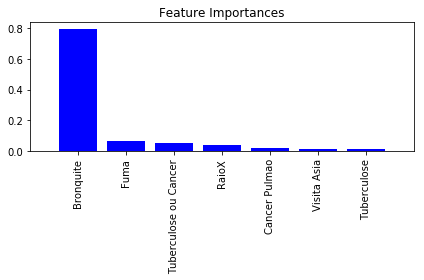

AttributeError: 'int' object has no attribute 'suptitle'

In [8]:
feat_labels = df_chest1k.columns

forest = RandomForestClassifier(n_estimators=10000,
                                criterion='entropy',
                                max_features='sqrt',
                                random_state=0,
                                n_jobs=-1)

forest.fit(X1k_train, y1k_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X1k_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X1k_train.shape[1]), 
        importances[indices],
        color='blue', 
        align='center')

plt.xticks(range(X1k_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X1k_train.shape[1]])
plt.tight_layout()
plt.show()

# fig, axis = plt.subplots(1,2)
# ax = axis[0]
# ax.bar(range(X1k_train.shape[1]), 
#         importances[indices],
#         color='blue', 
#         align='center')
# ax.xticks(range(X1k_train.shape[1]), feat_labels[indices], rotation=90)
# ax.xlim([-1, X1k_train.shape[1]])
# ax.tight_layout()
# ax.set_title('1k Data')

# ax = axis[1]
# ax.bar(range(X10k_train.shape[1]), 
#         importances[indices],
#         color='blue', 
#         align='center')
# ax.xticks(range(X10k_train.shape[1]), feat_labels[indices], rotation=90)
# ax.xlim([-1, X10k_train.shape[1]])
# ax.tight_layout()
# ax.set_title('10k Data')
# f.suptitle('Feature Importances')

y_pred = forest.predict(X1k_test)
print("Random Forest Accuracy: {0}%".format(metrics.accuracy_score(y1k_test, y_pred) * 100))

# <i>Decision Tree</i>

 1) Bronquite                      0.812992
 2) Tuberculose ou Cancer          0.133766
 3) Fuma                           0.028481
 4) RaioX                          0.011039
 5) Visita Asia                    0.009771
 6) Cancer Pulmao                  0.002110
 7) Tuberculose                    0.001842


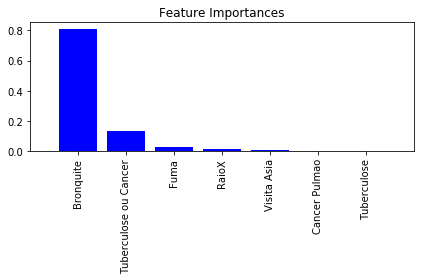

Decision Tree Accuracy: 83.66666666666667%


In [4]:
import graphviz
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy',
                                max_features='sqrt',
                                random_state=0)

#Treinamento com base de dados
clf1k = clf.fit(X1k_train, y1k_train)

#Plotagem das importâncias das características da base de dados
importancesTree = clf1k.feature_importances_
indices = np.argsort(importancesTree)[::-1]
for f in range(X1k_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importancesTree[indices[f]]))
    
plt.title('Feature Importances')
plt.bar(range(X1k_train.shape[1]), 
        importancesTree[indices],
        color='blue', 
        align='center')

plt.xticks(range(X1k_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X1k_train.shape[1]])
plt.tight_layout()
plt.show()


y_pred = clf.predict(X1k_test)
print("Decision Tree Accuracy: {0}%".format(metrics.accuracy_score(y1k_test, y_pred) * 100))

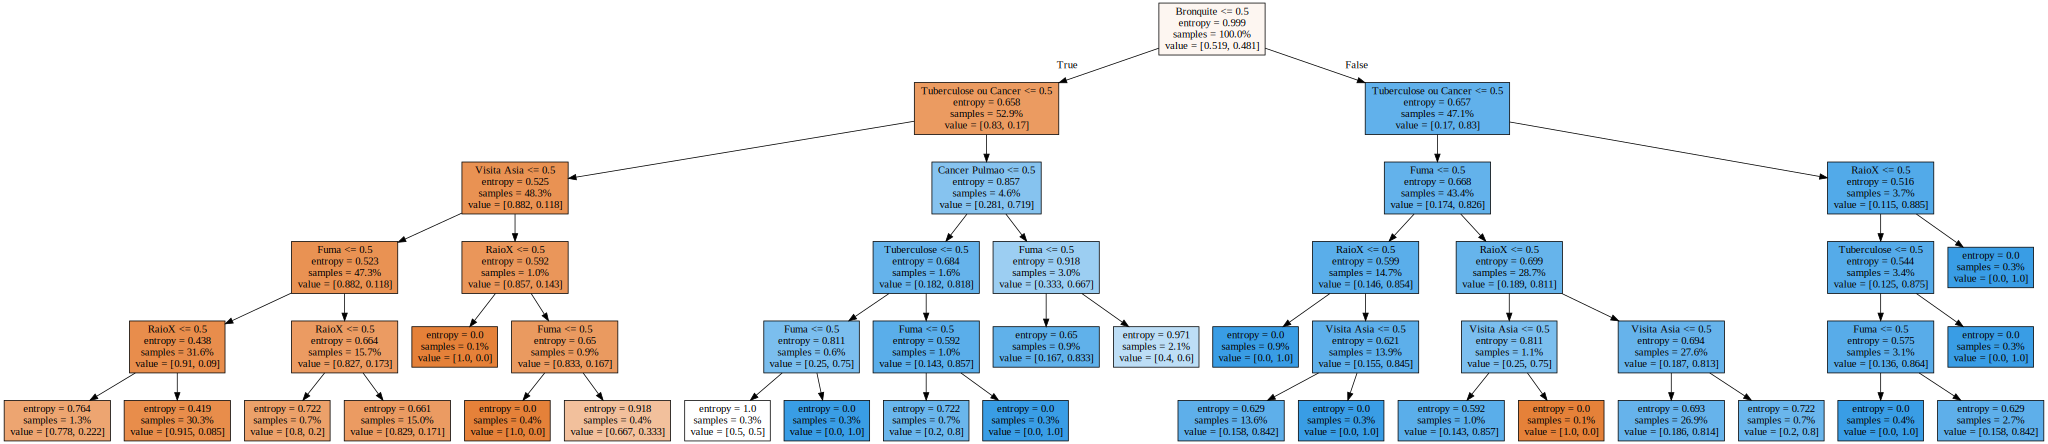

In [5]:
#Utilização da biblioteca graphviz para desenhar a árvore de decisão
dot_data1k = tree.export_graphviz(clf1k, proportion=True, 
                                  feature_names=['Visita Asia', 'Fuma', 'Tuberculose', 
                                                 'Cancer Pulmao', 'Bronquite', 'Tuberculose ou Cancer', 
                                                 'RaioX'], out_file= None, filled = True)
graph1k = graphviz.Source(dot_data1k)

#Exportação da árvore em pdf
#graph1k.render('tree1k')

#Plotagem da árvore de decisão
graph1k
